In [1]:
import torch_geometric
import torch
import matplotlib.pyplot as plt
import scipy
import glob
import random
from random import Random
import pandas as pd
from unicodedata import decimal
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
import math
import random
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from torch_geometric.data import InMemoryDataset
import torch_geometric.transforms as T

torch.cuda.empty_cache()

In [2]:
def read_xyz_data(path, intensity_filter=5):
    """
    Read an xyz file and extract the molecule's geometry.

    The file should be in the format::

        num_atoms
        comment
        ele0 x0 y0 z0
        ele1 x1 y1 z1
        ...

    Parameters
    ----------
    path : str
        A path to a file to read

    Returns
    -------
    val : LazyValues
        An object storing all the data
    """
    elements = []
    coords = []
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            x, y, z, I, _, _, _, _, _, _ ,_ = line.strip().split()
            if float(I) < intensity_filter:
                continue
            else:
                point = [float(x), float(y), float(z), float(I)]
                # elements.append(ele)
                coords.append(point)
    return(coords)
#     return LazyValues(elements=elements, coords=coords) 


In [3]:
# cd treesim
# sudo chmod -R 777 Helios_automation/output
# ls Helios_automation/output | wc -l # 10048! Takes a very long time to run!!

dataset_path = '/treesim/Helios_automation/output2/'
unique_params = os.listdir(dataset_path)
print(unique_params[0:8])

['gridsearchGrove11_grow_length_0-28_grow_nodes_4_add_chance_0-9_add_side_branches_3_flush_70_Conifer-Tancred-012', 'gridsearchGrove11_grow_length_0-36_grow_nodes_4_add_chance_0-9_add_side_branches_3_flush_80_Conifer-Tancred-012', 'gridsearchGrove11_grow_length_0-52_grow_nodes_2_add_chance_1_add_side_branches_6_flush_60_Conifer-Tancred-012', 'gridsearchGrove11_grow_length_0-52_grow_nodes_3_add_chance_0-8_add_side_branches_3_flush_40_Conifer-Tancred-012', 'gridsearchGrove11_grow_length_0-2_grow_nodes_3_add_chance_0-8_add_side_branches_4_flush_90_Conifer-Tancred-012', 'gridsearchGrove11_grow_length_0-52_grow_nodes_2_add_chance_0-8_add_side_branches_5_flush_40_Conifer-Tancred-012', 'gridsearchGrove11_grow_length_0-2_grow_nodes_4_add_chance_0-8_add_side_branches_4_flush_70_Conifer-Tancred-012', 'gridsearchGrove11_grow_length_0-44_grow_nodes_2_add_chance_0-8_add_side_branches_6_flush_40_Conifer-Tancred-012']


In [4]:
data_list = []
n_points = 10000000
N = len(os.listdir(dataset_path))
unique_params = os.listdir(dataset_path)

print(len(unique_params))
unique_params[0:3]

1173


['gridsearchGrove11_grow_length_0-28_grow_nodes_4_add_chance_0-9_add_side_branches_3_flush_70_Conifer-Tancred-012',
 'gridsearchGrove11_grow_length_0-36_grow_nodes_4_add_chance_0-9_add_side_branches_3_flush_80_Conifer-Tancred-012',
 'gridsearchGrove11_grow_length_0-52_grow_nodes_2_add_chance_1_add_side_branches_6_flush_60_Conifer-Tancred-012']

In [5]:
# data_list = []

# path = os.path.join(dataset_path, "gridsearchGrove11_grow_length_0-52_grow_nodes_3_add_chance_0-8_add_side_branches_3_flush_50_Conifer-Tancred-012", "pointclouds")
# # get file paths to xyz files for that tree
# points = glob.glob(path + "/*.xyz")
# # X Y Z intensity echoWidth returnNumber numberOfReturns fullwaveIndex hitObjectId class gpsTime
# data = []
# # read points from each leg for that tree into a list
# # data = [np.concatenate(np.array(read_xyz_data(file))) for file in points]
# # read points from each leg for that tree
# for file in points:
#     data_file = np.array(read_xyz_data(file, INTENSITY)) # 11 columns! X,Y,Z,I
#     if data_file.shape == (0,):
#         continue
#     else:
#         data.append(data_file)
# data = np.concatenate(np.array(data))
# # subset X,Y,Z,intensity
# arr = data[:,0:4]
# # find unique (rows?)
# arr_ = np.unique(arr,axis = 0)
# df2 = pd.DataFrame(arr_)
# orig_length = len(df2)
# if len(df2) < n_points:
#     print("len < n_points")
# else:
#     df2 = df2.sample(n=n_points)
# print("before:", arr.shape, "after:", len(df2))
# LEN = len(df2)
# pos = torch.from_numpy(df2.values[:,0:3]).to(torch.float)
# #         I = torch.from_numpy(df2.values[:,3:4]).to(torch.float)
# grow_len = split_name[3].replace("-", ".")
# grow_len = torch.from_numpy(np.array(float(grow_len))).to(torch.float)
# grow_nodes = split_name[6]
# grow_nodes = torch.from_numpy(np.array(float(grow_nodes))).to(torch.float)
# chance = split_name[9].replace("-", ".")
# chance = torch.from_numpy(np.array(float(chance))).to(torch.float)
# branches = split_name[13]
# branches = torch.from_numpy(np.array(float(branches))).to(torch.float)
# flush = split_name[15]
# flush = torch.from_numpy(np.array(float(flush))).to(torch.float)

# data = Data(pos=pos, grow_len = grow_len, grow_nodes = grow_nodes, chance = chance, flush = flush, tree_id = tree_id)
# data.treeID = tree_id
# data.orig_npos = orig_length

# data_list.append(data)


In [7]:
# param_sets = []
data_list = []
INTENSITY = 5
desired_tree = 12
# iterate over each tree
for i in range(0, 3000): # len(unique_params)): # [0:2]):
    split_name = unique_params[i].split(" ")[0].split("_")
    tree_id = int(split_name[-1].split("-")[2])
    if tree_id == desired_tree:
        print("Tree", tree_id)
        try:
            print("index", i)
            print("Tree number", unique_params[i])
            path = os.path.join(dataset_path, unique_params[i] , "pointclouds")
            # get file paths to xyz files for that tree
            points = glob.glob(path + "/*.xyz")
            # X Y Z intensity echoWidth returnNumber numberOfReturns fullwaveIndex hitObjectId class gpsTime
            data = []
            # read points from each leg for that tree into a list
            # data = [np.concatenate(np.array(read_xyz_data(file))) for file in points]
            # read points from each leg for that tree
            for file in points:
                data_file = np.array(read_xyz_data(file, INTENSITY)) # 11 columns! X,Y,Z,I
                if data_file.shape == (0,):
                    continue
                else:
                    data.append(data_file)
            data = np.concatenate(np.array(data))
            # subset X,Y,Z,intensity
            arr = data[:,0:4]
            # find unique (rows?)
            arr_ = np.unique(arr,axis = 0)
            df2 = pd.DataFrame(arr_)
            orig_length = len(df2)
#             if len(df2) < n_points:
#                 a = 1*1
# #                 print("len < n_points")
#             else:
#                 df2 = df2.sample(n=n_points)
#             print("before:", arr.shape, "after:", len(df2))
            LEN = len(df2)
            print("n_points,", LEN)
            pos = torch.from_numpy(df2.values[:,0:3]).to(torch.float)
    #         I = torch.from_numpy(df2.values[:,3:4]).to(torch.float)
            grow_len = split_name[3].replace("-", ".")
            grow_len = torch.from_numpy(np.array(float(grow_len))).to(torch.float)
            grow_nodes = split_name[6]
            grow_nodes = torch.from_numpy(np.array(float(grow_nodes))).to(torch.float)
            chance = split_name[9].replace("-", ".")
            chance = torch.from_numpy(np.array(float(chance))).to(torch.float)
            branches = split_name[13]
            branches = torch.from_numpy(np.array(float(branches))).to(torch.float)
            flush = split_name[15]
            flush = torch.from_numpy(np.array(float(flush))).to(torch.float)

            data = Data(pos=pos, grow_len = grow_len, grow_nodes = grow_nodes, chance = chance, branches=branches, flush = flush, treeID = tree_id)
            data.orig_npos = orig_length

    #         print(data)
            data_list.append(data)
#             print("count params, data_list", len(param_sets), len(data_list))
                # points_15.append(unique_params[i])
        except:
            print("FAILED ON!!: ",  unique_params[i])
            continue
    else:
        continue

# print(arr_.shape)

Tree 12
index 0
Tree number gridsearchGrove11_grow_length_0-28_grow_nodes_4_add_chance_0-9_add_side_branches_3_flush_70_Conifer-Tancred-012


/tmp/ipykernel_1901335/3179990366.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.concatenate(np.array(data))


n_points, 391965
Tree 12
index 1
Tree number gridsearchGrove11_grow_length_0-36_grow_nodes_4_add_chance_0-9_add_side_branches_3_flush_80_Conifer-Tancred-012
n_points, 893133
Tree 12
index 2
Tree number gridsearchGrove11_grow_length_0-52_grow_nodes_2_add_chance_1_add_side_branches_6_flush_60_Conifer-Tancred-012
n_points, 1606384
Tree 12
index 3
Tree number gridsearchGrove11_grow_length_0-52_grow_nodes_3_add_chance_0-8_add_side_branches_3_flush_40_Conifer-Tancred-012
n_points, 14276
Tree 12
index 4
Tree number gridsearchGrove11_grow_length_0-2_grow_nodes_3_add_chance_0-8_add_side_branches_4_flush_90_Conifer-Tancred-012
n_points, 138211
Tree 12
index 5
Tree number gridsearchGrove11_grow_length_0-52_grow_nodes_2_add_chance_0-8_add_side_branches_5_flush_40_Conifer-Tancred-012
n_points, 302261
Tree 12
index 6
Tree number gridsearchGrove11_grow_length_0-2_grow_nodes_4_add_chance_0-8_add_side_branches_4_flush_70_Conifer-Tancred-012
n_points, 241013
Tree 12
index 7
Tree number gridsearchGrove11

IndexError: list index out of range

In [8]:
data_list[2]

Data(pos=[1606384, 3], grow_len=0.5199999809265137, grow_nodes=2.0, chance=1.0, branches=6.0, flush=60.0, treeID=12, orig_npos=1606384)

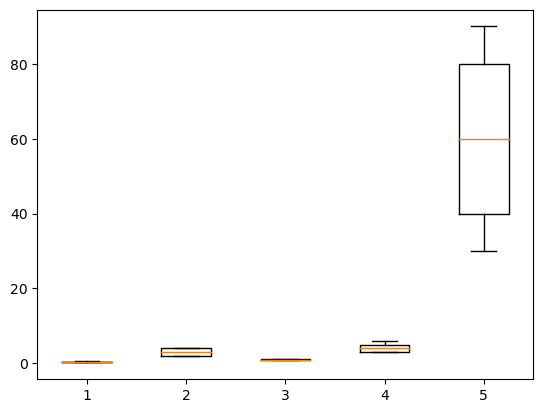

In [9]:
grow_len = [data_list[i].grow_len.item() for i in range(0, len (data_list))] #
grow_nodes = [data_list[i].grow_nodes.item() for i in range(0, len (data_list))] #
chance = [data_list[i].chance.item() for i in range(0, len (data_list))] #
branches = [data_list[i].branches.item() for i in range(0, len (data_list))] #
flush = [data_list[i].flush.item() for i in range(0, len (data_list))] #

# y_orig_val = [data_val[i].angle.item() for i in range(0, len (data_val))]
# y_orig_test = [data_test[i].angle.item() for i in range(0, len (data_test))]

plt.boxplot([grow_len, grow_nodes, chance, branches, flush])
plt.show()

In [108]:
np.unique(flush, return_counts=True)

(array([30., 40., 50., 60., 70., 80., 90.]),
 array([168, 168, 168, 168, 167, 167, 167]))

In [11]:
# HITE = [data_list[i].height for i in range(0, len (data_list))] #

# plt.boxplot([HITE])
# plt.show()

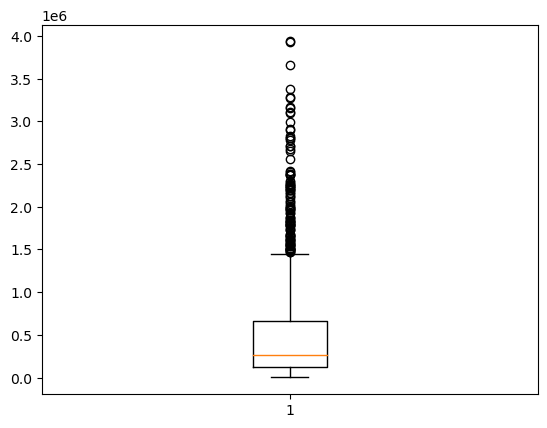

In [12]:
NPOINTS = [data_list[i].orig_npos for i in range(0, len (data_list))] #

plt.boxplot([NPOINTS])
plt.show()

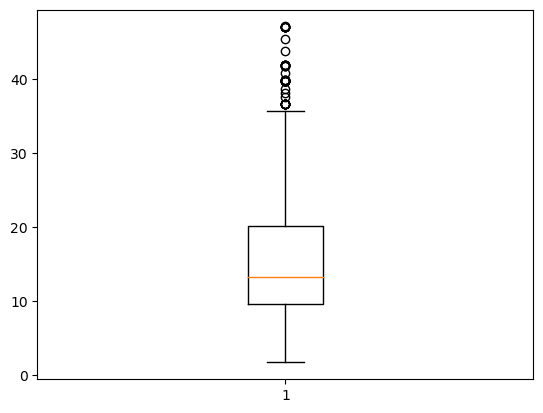

In [15]:
HEIGHT = [data_list[i].pos[:,2].max() for i in range(0, len (data_list))] #

plt.boxplot([HEIGHT])
plt.show()

In [16]:
max(NPOINTS), min(NPOINTS) # 3M!! Above 1.5M is outlier!?

(3933328, 2663)

In [17]:
random.seed(1991)
data_list2 = data_list.copy()
random.shuffle(data_list2)
data_train = data_list2[:round(len(data_list2)*0.8)]
data_val = data_list2[round(len(data_list2)*0.8):round(len(data_list2)*0.9)] # 100
data_test = data_list2[round(len(data_list2)*0.9):] # 100
data_test[0:10]

[Data(pos=[603673, 3], grow_len=0.2800000011920929, grow_nodes=4.0, chance=1.0, branches=6.0, flush=80.0, treeID=12, orig_npos=603673),
 Data(pos=[1175231, 3], grow_len=0.36000001430511475, grow_nodes=4.0, chance=0.800000011920929, branches=4.0, flush=70.0, treeID=12, orig_npos=1175231),
 Data(pos=[537783, 3], grow_len=0.2800000011920929, grow_nodes=4.0, chance=0.800000011920929, branches=6.0, flush=80.0, treeID=12, orig_npos=537783),
 Data(pos=[139725, 3], grow_len=0.36000001430511475, grow_nodes=2.0, chance=0.8999999761581421, branches=5.0, flush=70.0, treeID=12, orig_npos=139725),
 Data(pos=[260913, 3], grow_len=0.20000000298023224, grow_nodes=4.0, chance=1.0, branches=6.0, flush=80.0, treeID=12, orig_npos=260913),
 Data(pos=[2908216, 3], grow_len=0.5199999809265137, grow_nodes=3.0, chance=0.8999999761581421, branches=6.0, flush=70.0, treeID=12, orig_npos=2908216),
 Data(pos=[600374, 3], grow_len=0.4399999976158142, grow_nodes=4.0, chance=0.800000011920929, branches=3.0, flush=60.0,

In [18]:
print(len(data_train), len(data_val), len(data_test))

938 118 117


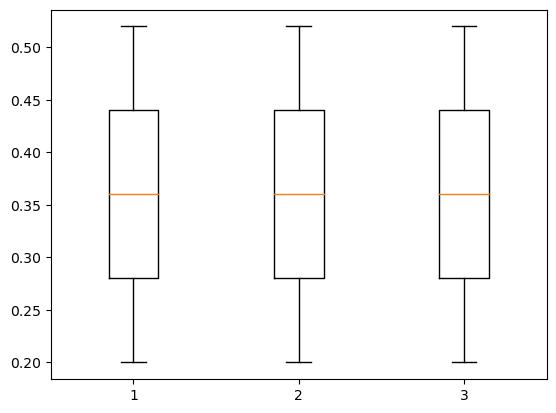

In [19]:
y_orig = [data_train[i].grow_len.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].grow_len.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].grow_len.item() for i in range(0, len (data_test))]
plt.boxplot([y_orig, y_orig_val, y_orig_test])
plt.show()

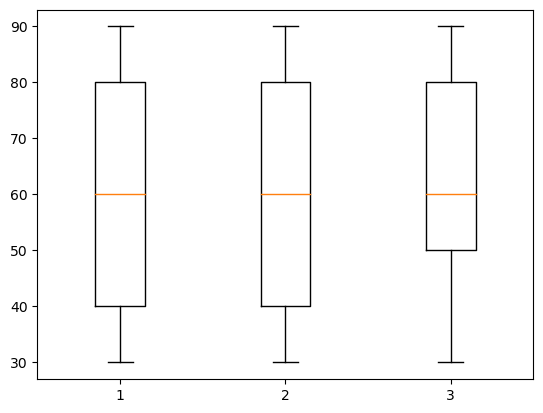

In [20]:
# Visualize distributions

y_orig = [data_train[i].flush.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].flush.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].flush.item() for i in range(0, len (data_test))]
plt.boxplot([y_orig, y_orig_val, y_orig_test])
plt.show()

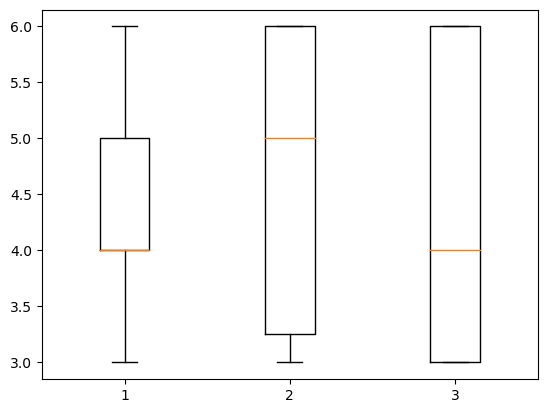

In [21]:
y_orig = [data_train[i].branches.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].branches.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].branches.item() for i in range(0, len (data_test))]
plt.boxplot([y_orig, y_orig_val, y_orig_test])
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler

y_orig = [data_train[i].grow_len.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].grow_len.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].grow_len.item() for i in range(0, len (data_test))]

scalerGL = MinMaxScaler((0,100))
scalerGL = scalerGL.fit(np.array(y_orig).reshape(-1, 1))
y_orig_new = scalerGL.transform(np.array(y_orig).reshape(-1, 1))
y_val_new = scalerGL.transform(np.array(y_orig_val).reshape(-1, 1))
y_test_new = scalerGL.transform(np.array(y_orig_test).reshape(-1, 1))

for i in range(0, len (data_train)):
    print(i, data_train[i].grow_len)
    print("new val", y_orig_new[i])
    print(torch.from_numpy(np.array(np.round(y_orig_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_orig_new[i][0], 2))).to(torch.float) # new_train
    data_train[i].grow_len2 = val
    print(i, data_train[i].grow_len2)

for i in range(0, len (data_val)):
    print(i, data_train[i].grow_len)
    print("new val", y_val_new[i])
    print(torch.from_numpy(np.array(np.round(y_val_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_val_new[i][0], 2))).to(torch.float) # new_train
    data_val[i].grow_len2 = val
    print(i, data_val[i].grow_len2)

    
for i in range(0, len (data_test)):
    print(i, data_test[i].grow_len)
    print("new val", y_test_new[i])
    print(torch.from_numpy(np.array(np.round(y_test_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_test_new[i][0], 2))).to(torch.float) # new_train
    data_test[i].grow_len2 = val
    print(i, data_test[i].grow_len2)


0 tensor(0.2000)
new val [0.]
tensor(0.)
0 tensor(0.)
1 tensor(0.4400)
new val [75.00000349]
tensor(75.)
1 tensor(75.)
2 tensor(0.2800)
new val [25.00000116]
tensor(25.)
2 tensor(25.)
3 tensor(0.3600)
new val [50.00000698]
tensor(50.)
3 tensor(50.)
4 tensor(0.2800)
new val [25.00000116]
tensor(25.)
4 tensor(25.)
5 tensor(0.2800)
new val [25.00000116]
tensor(25.)
5 tensor(25.)
6 tensor(0.4400)
new val [75.00000349]
tensor(75.)
6 tensor(75.)
7 tensor(0.2000)
new val [0.]
tensor(0.)
7 tensor(0.)
8 tensor(0.4400)
new val [75.00000349]
tensor(75.)
8 tensor(75.)
9 tensor(0.2000)
new val [0.]
tensor(0.)
9 tensor(0.)
10 tensor(0.3600)
new val [50.00000698]
tensor(50.)
10 tensor(50.)
11 tensor(0.2000)
new val [0.]
tensor(0.)
11 tensor(0.)
12 tensor(0.2800)
new val [25.00000116]
tensor(25.)
12 tensor(25.)
13 tensor(0.2000)
new val [0.]
tensor(0.)
13 tensor(0.)
14 tensor(0.4400)
new val [75.00000349]
tensor(75.)
14 tensor(75.)
15 tensor(0.2000)
new val [0.]
tensor(0.)
15 tensor(0.)
16 tensor(0.36

In [94]:
from sklearn.preprocessing import MinMaxScaler

y_orig = [data_train[i].flush.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].flush.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].flush.item() for i in range(0, len (data_test))]

scalerFL = MinMaxScaler((0,100))
scalerFL = scalerFL.fit(np.array(y_orig).reshape(-1, 1))
y_orig_new = scalerFL.transform(np.array(y_orig).reshape(-1, 1))
y_val_new = scalerFL.transform(np.array(y_orig_val).reshape(-1, 1))
y_test_new = scalerFL.transform(np.array(y_orig_test).reshape(-1, 1))

for i in range(0, len (data_train)):
    print("new val", y_orig_new[i])
    print(torch.from_numpy(np.array(np.round(y_orig_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_orig_new[i][0], 2))).to(torch.float)
    data_train[i].flush2 = val
    print(i, data_train[i].flush2)

for i in range(0, len (data_val)):
    print("new val", y_val_new[i])
    print(torch.from_numpy(np.array(np.round(y_val_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_val_new[i][0], 2))).to(torch.float)
    data_val[i].flush2 = val
    print(i, data_val[i].flush2)

for i in range(0, len (data_test)):
    print("new val", y_test_new[i])
    print(torch.from_numpy(np.array(np.round(y_test_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_test_new[i][0], 2))).to(torch.float)
    data_test[i].flush2 = val
    print(i, data_test[i].flush2)


new val [66.66666667]
tensor(66.6700)
0 tensor(66.6700)
new val [0.]
tensor(0.)
1 tensor(0.)
new val [0.]
tensor(0.)
2 tensor(0.)
new val [0.]
tensor(0.)
3 tensor(0.)
new val [83.33333333]
tensor(83.3300)
4 tensor(83.3300)
new val [66.66666667]
tensor(66.6700)
5 tensor(66.6700)
new val [83.33333333]
tensor(83.3300)
6 tensor(83.3300)
new val [66.66666667]
tensor(66.6700)
7 tensor(66.6700)
new val [100.]
tensor(100.)
8 tensor(100.)
new val [16.66666667]
tensor(16.6700)
9 tensor(16.6700)
new val [100.]
tensor(100.)
10 tensor(100.)
new val [50.]
tensor(50.)
11 tensor(50.)
new val [100.]
tensor(100.)
12 tensor(100.)
new val [66.66666667]
tensor(66.6700)
13 tensor(66.6700)
new val [83.33333333]
tensor(83.3300)
14 tensor(83.3300)
new val [66.66666667]
tensor(66.6700)
15 tensor(66.6700)
new val [33.33333333]
tensor(33.3300)
16 tensor(33.3300)
new val [33.33333333]
tensor(33.3300)
17 tensor(33.3300)
new val [83.33333333]
tensor(83.3300)
18 tensor(83.3300)
new val [33.33333333]
tensor(33.3300)
1

In [95]:
from sklearn.preprocessing import MinMaxScaler

y_orig = [data_train[i].branches.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].branches.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].branches.item() for i in range(0, len (data_test))]

scalerBR = MinMaxScaler((0,100))
scalerBR = scalerBR.fit(np.array(y_orig).reshape(-1, 1))
y_orig_new = scalerBR.transform(np.array(y_orig).reshape(-1, 1))
y_val_new = scalerBR.transform(np.array(y_orig_val).reshape(-1, 1))
y_test_new = scalerBR.transform(np.array(y_orig_test).reshape(-1, 1))

for i in range(0, len (data_train)):
    print("new val", y_orig_new[i])
    print(torch.from_numpy(np.array(np.round(y_orig_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_orig_new[i][0], 2))).to(torch.float)
    data_train[i].branches2 = val
    print(i, data_train[i].branches2)

for i in range(0, len (data_val)):
    print("new val", y_val_new[i])
    print(torch.from_numpy(np.array(np.round(y_val_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_val_new[i][0], 2))).to(torch.float)
    data_val[i].branches2 = val
    print(i, data_val[i].branches2)

    
for i in range(0, len (data_test)):
    print("new val", y_test_new[i])
    print(torch.from_numpy(np.array(np.round(y_test_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_test_new[i][0], 2))).to(torch.float)
    data_test[i].branches2 = val
    print(i, data_test[i].branches2)


new val [66.66666667]
tensor(66.6700)
0 tensor(66.6700)
new val [0.]
tensor(0.)
1 tensor(0.)
new val [66.66666667]
tensor(66.6700)
2 tensor(66.6700)
new val [0.]
tensor(0.)
3 tensor(0.)
new val [33.33333333]
tensor(33.3300)
4 tensor(33.3300)
new val [0.]
tensor(0.)
5 tensor(0.)
new val [0.]
tensor(0.)
6 tensor(0.)
new val [33.33333333]
tensor(33.3300)
7 tensor(33.3300)
new val [100.]
tensor(100.)
8 tensor(100.)
new val [100.]
tensor(100.)
9 tensor(100.)
new val [100.]
tensor(100.)
10 tensor(100.)
new val [0.]
tensor(0.)
11 tensor(0.)
new val [0.]
tensor(0.)
12 tensor(0.)
new val [33.33333333]
tensor(33.3300)
13 tensor(33.3300)
new val [100.]
tensor(100.)
14 tensor(100.)
new val [33.33333333]
tensor(33.3300)
15 tensor(33.3300)
new val [100.]
tensor(100.)
16 tensor(100.)
new val [33.33333333]
tensor(33.3300)
17 tensor(33.3300)
new val [0.]
tensor(0.)
18 tensor(0.)
new val [66.66666667]
tensor(66.6700)
19 tensor(66.6700)
new val [66.66666667]
tensor(66.6700)
20 tensor(66.6700)
new val [0.

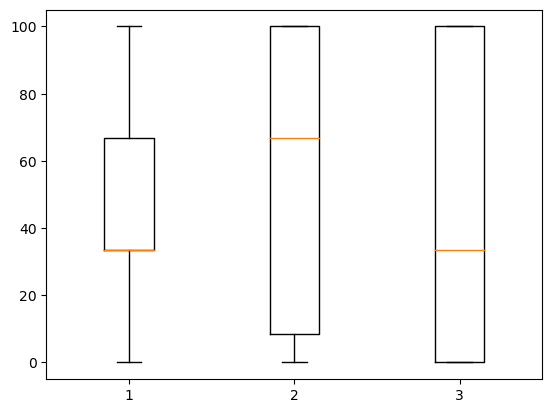

In [29]:
# dont run!! otherwise it affet guessing RMSE value
y_orig = [data_train[i].branches2.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].branches2.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].branches2.item() for i in range(0, len (data_test))]
plt.boxplot([y_orig, y_orig_val, y_orig_test])
plt.show()

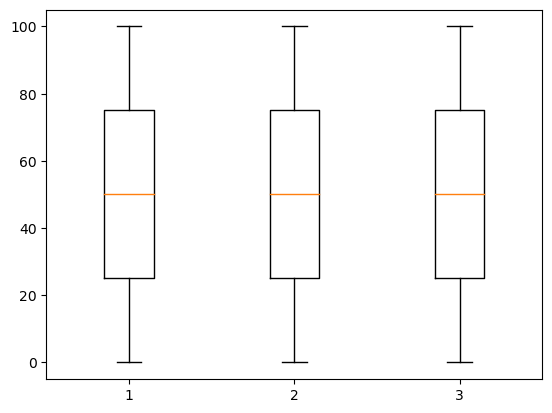

In [30]:
# dont run!! otherwise it affet guessing RMSE value
y_orig = [data_train[i].grow_len2.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].grow_len2.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].grow_len2.item() for i in range(0, len (data_test))]
plt.boxplot([y_orig, y_orig_val, y_orig_test])
plt.show()

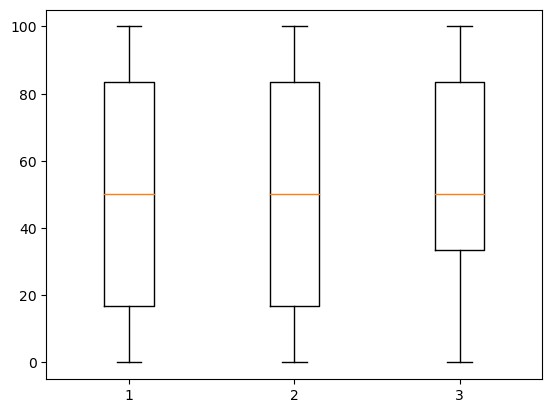

In [31]:
# dont run!! otherwise it affet guessing RMSE value
y_orig = [data_train[i].flush2.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].flush2.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].flush2.item() for i in range(0, len (data_test))]
plt.boxplot([y_orig, y_orig_val, y_orig_test])
plt.show()

In [2]:
# plt.scatter(weight, n_pos) # n_edges
# plt.show()

In [3]:
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(weight, n_pos)
# print("R2", r_value)

In [4]:
# plt.scatter(weight, n_pos_orig) # n_edges
# plt.show()

In [83]:
data_test[0:5]

[Data(edge_index=[2, 36802], pos=[45164, 3], grow_len=0.5199999809265137, grow_nodes=3.0, chance=1.0, branches=3.0, flush=30.0, height=15.773228645324707, grow_len2=100.0, flush2=0.0, branches2=0.0),
 Data(edge_index=[2, 31499], pos=[38395, 3], grow_len=0.36000001430511475, grow_nodes=4.0, chance=1.0, branches=5.0, flush=30.0, height=10.889847755432129, grow_len2=50.0, flush2=0.0, branches2=66.66999816894531),
 Data(edge_index=[2, 56120], pos=[66954, 3], grow_len=0.2800000011920929, grow_nodes=2.0, chance=1.0, branches=3.0, flush=80.0, height=22.539936065673828, grow_len2=25.0, flush2=83.33000183105469, branches2=0.0),
 Data(edge_index=[2, 156914], pos=[190468, 3], grow_len=0.36000001430511475, grow_nodes=3.0, chance=0.800000011920929, branches=3.0, flush=80.0, height=24.52273941040039, grow_len2=50.0, flush2=83.33000183105469, branches2=0.0),
 Data(edge_index=[2, 80554], pos=[97003, 3], grow_len=0.4399999976158142, grow_nodes=4.0, chance=0.800000011920929, branches=3.0, flush=90.0, he

In [67]:
print(len(data_train),len(data_val), len(data_test))

938 118 117


In [68]:
data_train[0]

Data(edge_index=[2, 29159], pos=[35424, 3], grow_len=0.5199999809265137, grow_nodes=2.0, chance=0.800000011920929, branches=5.0, flush=60.0, height=15.518725395202637, grow_len2=100.0, flush2=50.0, branches2=66.66999816894531)

In [32]:
class DBHDataSet_train_aug(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def processed_file_names(self):
        return ['data.pt']

    def process(self):
        data_list = data_train

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])
        
transform = T.Compose([T.KNNGraph(k=5)]) # T.Center(),
fly_transform = T.Compose([
    T.RandomRotate(degrees = [-180, 180], axis = 2),
#                         T.RandomRotate(degrees = [-10, 10], axis = 0),
#                         T.RandomRotate(degrees = [-10, 10], axis = 1)
])

DBH_DS = DBHDataSet_train_aug(root = "/treesim/Deep_Learning/PyTorch_Geometric/PyG_Datasets/train_newest_tree12_PCD_K5_v0", 
                              transform = fly_transform, pre_transform=transform) # , , transform = fly_transform

Processing...
Done!


In [70]:
torch_geometric.__version__

'2.2.0'

In [71]:
DBH_DS[33].pos[:,2].min()

tensor(-0.1698)

In [33]:
class DBHDataSet_val(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def processed_file_names(self):
        return ['data.pt']

    def process(self):
        data_list = data_val

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])

transform = T.Compose([T.KNNGraph(k=5)])

DBH_DS_val = DBHDataSet_val(root = "/treesim/Deep_Learning/PyTorch_Geometric/PyG_Datasets/val_newest_tree12_PCD_K5_v0",
                            pre_transform=transform) 


Processing...
Done!


In [74]:
class DBHDataSet_test(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def processed_file_names(self):
        return ['data.pt']

    def process(self):
        data_list = data_test

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])

transform = T.Compose([T.KNNGraph(k=5)])

# DBH_DS_test = DBHDataSet_val(root = "/treesim/Deep_Learning/PyTorch_Geometric/PyG_Datasets/test_newest_tree12_PCD_K5_v0",
#                             pre_transform=transform) # DAMN HAD IT WRONG! But can still compute test error :)

# DBH_DS_test = DBHDataSet_test(root = "/treesim/Deep_Learning/PyTorch_Geometric/PyG_Datasets/test_newest_tree12_PCD_K5_v0",
#                             pre_transform=transform) 

DBH_DS_test = DBHDataSet_test(root = "/treesim/Deep_Learning/PyTorch_Geometric/PyG_Datasets/testv1_newest_tree12_PCD_K5_v0",
                            pre_transform=transform) 

Processing...
Done!


In [71]:
data_test[0]

Data(pos=[603673, 3], grow_len=0.2800000011920929, grow_nodes=4.0, chance=1.0, branches=6.0, flush=80.0, treeID=12, orig_npos=603673, flush2=83.33000183105469, branches2=100.0, grow_len2=25.0)

In [72]:
data_val[0]

Data(pos=[121506, 3], grow_len=0.4399999976158142, grow_nodes=2.0, chance=0.800000011920929, branches=4.0, flush=30.0, treeID=12, orig_npos=121506, flush2=0.0, branches2=33.33000183105469, grow_len2=75.0, edge_index=[2, 607530])

In [73]:
data_train[0]

Data(pos=[123015, 3], grow_len=0.20000000298023224, grow_nodes=3.0, chance=0.8999999761581421, branches=5.0, flush=70.0, treeID=12, orig_npos=123015, flush2=66.66999816894531, branches2=66.66999816894531, grow_len2=0.0, edge_index=[2, 615075])

In [76]:
DBH_DS_test[0]

Data(pos=[603673, 3], grow_len=[1], grow_nodes=[1], chance=[1], branches=[1], flush=[1], treeID=[1], orig_npos=[1], flush2=[1], branches2=[1], grow_len2=[1], edge_index=[2, 3018365])

In [77]:
DBH_DS_val[0]

Data(pos=[121506, 3], grow_len=[1], grow_nodes=[1], chance=[1], branches=[1], flush=[1], treeID=[1], orig_npos=[1], flush2=[1], branches2=[1], grow_len2=[1], edge_index=[2, 607530])

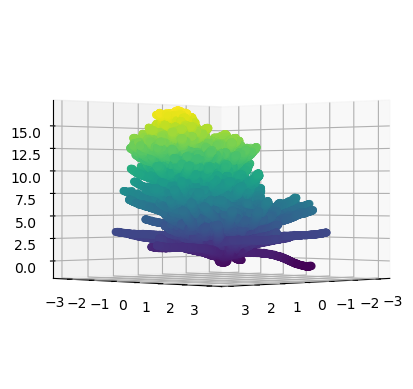

<Figure size 1400x1000 with 0 Axes>

In [35]:
ax = plt.axes(projection='3d')
fig = plt.figure(figsize = (14, 10))

# Data for a three-dimensional line
# zline = np.linspace(0, 15, 1000)
# xline = np.sin(zline)
# yline = np.cos(zline)
# ax.plot3D(xline, yline, zline, 'gray')

i = 0

# Data for three-dimensional scattered points
# ax.scatter3D(DBH_DS_test[i].pos[:, 0], DBH_DS_test[i].pos[:, 1], DBH_DS_test[i].pos[:, 2], c=DBH_DS_test[i].pos[:, 2]) # , cmap='Greens');
ax.scatter3D(data_list[i].pos[:, 0], data_list[i].pos[:, 1], data_list[i].pos[:, 2], c=data_list[i].pos[:, 2]) # , cmap='Greens');

ax.view_init(0, 45)

plt.show()

In [34]:
np.array(data_list[0].pos).shape
np.savetxt("/treesim/data_list0_pointcloud.txt", np.array(data_list[0].pos))

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_points(pos, edge_index=None, index=None):
    fig = plt.figure(figsize=(10, 10))
    if edge_index is not None:
        for (src, dst) in edge_index.t().tolist():
             src = pos[src].tolist()
             dst = pos[dst].tolist()
             plt.plot([src[0], dst[0]], [src[1], dst[1]], linewidth=0.2, color='black')
    if index is None:
        plt.scatter(pos[:, 0], pos[:, 1], s=50, zorder=1)
    else:
       mask = torch.zeros(pos.size(0), dtype=torch.bool)
       mask[index] = True
       plt.scatter(pos[~mask, 1], pos[~mask, 2], s=20, color='lightgray', zorder=1000)
       plt.scatter(pos[mask, 1], pos[mask, 2], s=20, zorder=1000)
    plt.axis('off')
    plt.show()

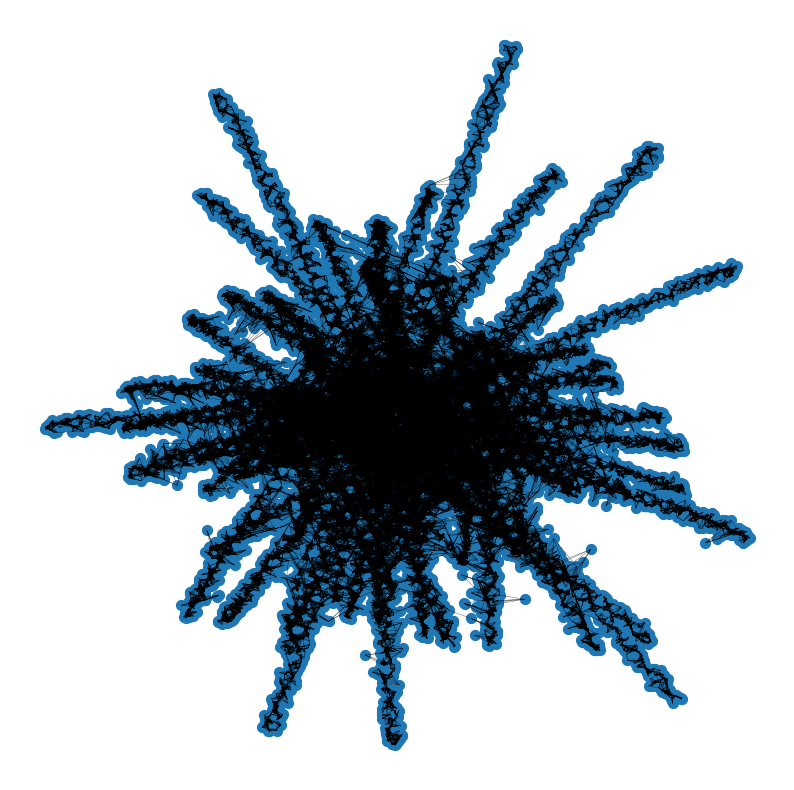

In [44]:
# visualize_points(data.pos, edge_index=data.edge_index)

torch.Size([2, 1058820])


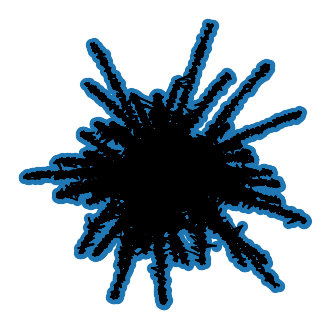

In [37]:
# from torch_cluster import knn_graph

# dataset = data_list.copy()

# data = dataset[0]
# data.edge_index = knn_graph(data.pos, k=5)
# print(data.edge_index.shape)
# visualize_points(data.pos, edge_index=data.edge_index)

In [41]:
data

Data(pos=[211764, 3], grow_len=0.36000001430511475, grow_nodes=2.0, chance=0.800000011920929, flush=70.0, tree_id=6, treeID=6, orig_npos=211764, edge_index=[2, 1058820])

In [ ]:
# np.array(data_list[0].pos).shape
# np.savetxt("/treesim/data_list0_pointcloud.txt", np.array(data_list[0].pos))

In [ ]:
# plt.scatter(weight, max_z) # x, y
# plt.show()

In [ ]:
# plt.scatter(weight, n_pos) # x, y
# plt.show()

In [75]:
test_loader = DataLoader(DBH_DS_test, batch_size=TRAIN_BS, shuffle = False, num_workers=25)


In [53]:
TRAIN_BS = 1
train_loader = DataLoader(DBH_DS, batch_size=TRAIN_BS, shuffle=True, num_workers=24) # BS must be equal to (or multiple?) of hidden_channels??
val_loader = DataLoader(DBH_DS_val, batch_size=TRAIN_BS, shuffle = False, num_workers=24)
test_loader = DataLoader(DBH_DS_test, batch_size=TRAIN_BS, shuffle = False, num_workers=25)
print("DATALOADERS READY")

DATALOADERS READY


In [54]:
## Test RMSE if Guessing Training mean

rms = 16
len(y_orig)
import statistics

statistics.mean(y_orig), statistics.mean(y_orig_test)

y_test_guess = []
# just keep appending the training data mean
for i in range(0, len(y_orig_test)):
    y_test_guess.append(statistics.mean(y_orig))

## Guessing RMSE (because squared = False)

# compare testing param values vs training data mean
rms = mean_squared_error(y_orig_test, y_test_guess, squared=False)
print(rms) # Ag Test Guess: 31.68 

# 26.4


31.203774371200478


In [55]:
# average number of points in test examples:
points = []
import statistics

for data in DBH_DS_test:
    points.append(len(data.pos[:,0]))

print(statistics.mean(points))

565155.1355932204


In [56]:
""" GNN MULTITASK SKELETONS"""

import torch
import torch.nn.functional as F
from torch_cluster import knn_graph, knn
from torch_geometric.nn import global_max_pool, global_mean_pool, global_sort_pool #, TopKPooling
from torch_cluster import fps

from torch.nn import Sequential, Linear, ReLU #, Conv1d
from torch_geometric.nn import MessagePassing
from torch_geometric.transforms import BaseTransform
from torch_geometric.utils import remove_isolated_nodes, dropout_adj

# K = 16 # no KNN graph cause we already have the edge_index :)
LOOP = True
FILTERS = 16
# scaler = "None"
TOPK = 0.5
Dropout = True

class PointNetLayer(MessagePassing):
    def __init__(self, in_channels, out_channels):
        # Message passing with "max" aggregation.
        super().__init__(aggr='max') # max
        
        # Initialization of the MLP:
        # Here, the number of input features correspond to the hidden node
        # dimensionality plus point dimensionality (=3).
        self.mlp = Sequential(Linear(in_channels + 3, out_channels),
                              ReLU(),
                              Linear(out_channels, out_channels))
        
    def forward(self, h, pos, edge_index):
        # Start propagating messages.
        return self.propagate(edge_index, h=h, pos=pos)
    
    def message(self, h_j, pos_j, pos_i):
        # h_j defines the features of neighboring nodes as shape [num_edges, in_channels]
        # pos_j defines the position of neighboring nodes as shape [num_edges, 3]
        # pos_i defines the position of central nodes as shape [num_edges, 3]

        input = pos_j - pos_i  # Compute spatial relation.

        if h_j is not None:
            # In the first layer, we may not have any hidden node features,
            # so we only combine them in case they are present.
            input = torch.cat([h_j, input], dim=-1)

        return self.mlp(input)  # Apply our final MLP.
    

class PointNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(12345)
        torch.cuda.manual_seed_all(12345)
        self.conv1 = PointNetLayer(3, FILTERS) # 32 
        self.conv2 = PointNetLayer(FILTERS, FILTERS)# 32
        self.conv3 = PointNetLayer(FILTERS, FILTERS)# 32
#         self.dropout40 = torch.nn.Dropout(0.5)
#         self.dropout60 = torch.nn.Dropout(0.5)
        self.regressor1 = Linear(FILTERS, 1)  # 32, 1 # in_features, out_features
        self.regressor2 = Linear(FILTERS, 1)  # 32, 1 # in_features, out_features
        self.regressor3 = Linear(FILTERS, 1)  # 32, 1 # in_features, out_features
        
    def forward(self, pos, edge_index, batch): # pos
        # Compute the kNN graph:
        # Here, we need to pass the batch vector to the function call in order
        # to prevent creating edges between points of different examples.
        # We also add `loop=True` which will add self-loops to the graph in
        # order to preserve central point information.
        edge_index = remove_isolated_nodes(edge_index)[0]

        # 3. Start bipartite message passing.
        h = self.conv1(h=pos, pos=pos, edge_index=edge_index)
        h = h.relu()
        
        h = self.conv2(h=h, pos=pos, edge_index=edge_index)
        h = h.relu()

        h = self.conv2(h=h, pos=pos, edge_index=edge_index)
        h = h.relu()
        
        # 4. Global Pooling.
        h = global_mean_pool(h, batch)  # pools the features [num_examples, hidden_channels]
        
        # 5. Regressors.
        return [self.regressor1(h), self.regressor2(h), self.regressor3(h)]



In [59]:
import gc
import torch
gc.collect()
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

In [60]:
# torch.cuda.empty_cache() 

def train(model, optimizer, loader):
    model.train()
    total_loss = 0
    count = 0
    for data_batch in loader:
        data = data_batch
        optimizer.zero_grad()  # Clear gradients.
        logits = model(data.pos.to(device), data.edge_index.to(device), data.batch.to(device))  # Forward pass. #data.pos
        loss1 = loss_angle(logits[0].to(torch.float32).squeeze(-1).to(device), data.grow_len2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss2 = loss_weight(logits[1].to(torch.float32).squeeze(-1).to(device), data.branches2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss3 = loss_tu(logits[2].to(torch.float32).squeeze(-1).to(device), data.flush2.to(torch.float32).to(device)) # Loss computation. # logits[1]

        loss = loss1 + loss2 + loss3
        loss.backward()  # Backward pass.
        optimizer.step()  # Update model parameters.
        
#         print(loss.item())
#         print("loss item", loss.item())
        total_loss += loss.item() # * data.num_graphs (num_graphs is just batch size.. weird)
        count+=1

    return math.sqrt(total_loss / count) # len(train_loader.dataset)) math.sqrt(

@torch.no_grad()
def test_rmse(model, loader):
    model.eval()
    total_MSE = 0
    count = 0
    # 
    for data_batch in loader:
        data = data_batch
        preds = model(data.pos.to(device), data.edge_index.to(device), data.batch.to(device))
#         y_output_pred.squeeze(-1)
        loss1 = loss_angle(preds[0].to(torch.float32).squeeze(-1).to(device), data.grow_len2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss2 = loss_weight(preds[1].to(torch.float32).squeeze(-1).to(device), data.branches2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss3 = loss_tu(preds[2].to(torch.float32).squeeze(-1).to(device), data.flush2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss = loss1 + loss2 + loss3
#         print("losses:", loss1, loss2, loss3)
#         print("loss item", loss.item())
        total_MSE += loss.item() #  * data.num_graphs
        count+=1
        
    return math.sqrt(total_MSE / count) ## math.sqrt(
# Epoch: 09, TR: 40.5951, VAL: 44.0514, TEST: 43.7503 REST:(18.959806190820018, 30.748798626017233, 25.222228839591452)

def class_rmse(model, loader):
    model.eval()
    MSE_1 = 0
    MSE_2 = 0
    MSE_3 = 0
    count = 0

    for data_batch in loader:
        data = data_batch
        preds = model(data.pos.to(device), data.edge_index.to(device), data.batch.to(device))
#         y_output_pred.squeeze(-1)
        loss1 = loss_angle(preds[0].to(torch.float32).squeeze(-1).to(device), data.grow_len2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss2 = loss_weight(preds[1].to(torch.float32).squeeze(-1).to(device), data.branches2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss3 = loss_tu(preds[2].to(torch.float32).squeeze(-1).to(device), data.flush2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        MSE_1 += loss1.item()
        MSE_2 += loss2.item()
        MSE_3 += loss3.item()
        count+=1
        
    return math.sqrt(MSE_1 / count), math.sqrt(MSE_2 / count), math.sqrt(MSE_3 / count)

def test_rmse_new(model, loader):
    model.eval()
    MSE_1 = 0
    MSE_2 = 0
    MSE_3 = 0
    count = 0

    for data_batch in loader:
        data = data_batch
        preds = model(data.pos.to(device), data.edge_index.to(device), data.batch.to(device))
#         y_output_pred.squeeze(-1)
        loss1 = loss_angle(preds[0].to(torch.float32).squeeze(-1).to(device), data.grow_len2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss2 = loss_weight(preds[1].to(torch.float32).squeeze(-1).to(device), data.branches2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss3 = loss_tu(preds[2].to(torch.float32).squeeze(-1).to(device), data.flush2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        MSE_1 += loss1.item()
        MSE_2 += loss2.item()
        MSE_3 += loss3.item()
        count+=1
        
    return (math.sqrt(MSE_1 / count) + math.sqrt(MSE_2 / count) + math.sqrt(MSE_3 / count)) / 3

print("DONE")

DONE


In [62]:
torch.cuda.empty_cache()
device = torch.device('cuda') #  if torch.cuda.is_available() else 'cpu')
model = PointNet().to(device)
LR = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr=LR)
loss_angle = torch.nn.MSELoss(reduction='mean')
loss_weight = torch.nn.MSELoss(reduction='mean')
loss_tu = torch.nn.MSELoss(reduction='mean')

print("LR:", LR, "Tr:", 96, "Test:", "24:", "Seed:", 105, "Filters:",
      FILTERS, "LOOP:", LOOP,  "BS:", TRAIN_BS, "Dropout:", Dropout)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience = 75, verbose = True)

best_val_mse = 1000
train_loss_hist = []
val_loss_hist = []
test_loss_hist = []
# print("Need to beat guessing accuracy of:", rms)

import time
start_time = time.time()

for epoch in range(1, 100000):
    loss = train(model, optimizer, train_loader)
    val_mse = test_rmse(model, val_loader)
    test_mse = test_rmse(model, test_loader)
#     test_mse_new = test_rmse_new(model, test_loader)
    mse1, mse2, mse3 = class_rmse(model, test_loader)
    train_loss_hist.append(loss)
    val_loss_hist.append(val_mse)
    test_loss_hist.append(test_mse)
    scheduler.step(loss) # scheduler according to training loss
    print("--- %s seconds ---" % (time.time() - start_time))
    if val_mse < best_val_mse:
        best_val_mse = val_mse # 
        mod_name = '/treesim/Deep_Learning/PyTorch_Geometric/Models/grove_1100_PCD_tree12_v0.pt' # redo with non-downsampled clouds 
        torch.save(model.state_dict(), mod_name) # 
        print(f'Epoch: {epoch:02d}, TR: {loss:.4f}, VAL: {val_mse:.4f}, TEST: {test_mse:.4f}, REST:{(mse1, mse2, mse3)}')
        print("saving", mod_name)
    else:
        print(f'Epoch: {epoch:02d}, TR: {loss:.4f}, VAL: {val_mse:.4f}, TEST: {test_mse:.4f} REST:{(mse1, mse2, mse3)}')


LR: 0.01 Tr: 96 Test: 24: Seed: 105 Filters: 16 LOOP: True BS: 1 Dropout: True
--- 230.1387176513672 seconds ---
Epoch: 01, TR: 61.2771, VAL: 64.6278, TEST: 64.6278, REST:(33.77792938472959, 42.85714384731029, 34.6275092019079)
saving /treesim/Deep_Learning/PyTorch_Geometric/Models/grove_1100_PCD_tree12_v0.pt
--- 461.00456714630127 seconds ---
Epoch: 02, TR: 58.4780, VAL: 57.4891, TEST: 57.4891, REST:(28.298005793545613, 41.2607645661836, 28.31546746569595)
saving /treesim/Deep_Learning/PyTorch_Geometric/Models/grove_1100_PCD_tree12_v0.pt
--- 692.2825264930725 seconds ---
Epoch: 03, TR: 57.5701, VAL: 56.5919, TEST: 56.5919, REST:(28.682438592779075, 40.12003223218144, 27.75502304313119)
saving /treesim/Deep_Learning/PyTorch_Geometric/Models/grove_1100_PCD_tree12_v0.pt
--- 928.4731192588806 seconds ---
Epoch: 04, TR: 55.8475, VAL: 52.9087, TEST: 52.9087, REST:(24.994037455448368, 38.08795809129655, 26.90603067224235)
saving /treesim/Deep_Learning/PyTorch_Geometric/Models/grove_1100_PCD_

KeyboardInterrupt: 

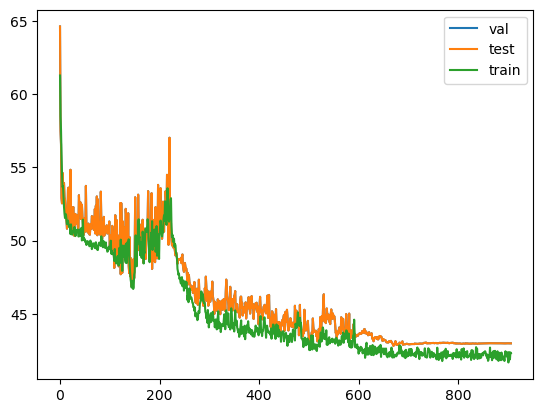

In [63]:
# loss graph

x_list = [i for i in range(0, len(train_loss_hist))]

plt.plot(x_list[0:2000], val_loss_hist[0:2000], label='val')
plt.plot(x_list[0:2000], test_loss_hist[0:2000], label='test')
plt.plot(x_list[0:2000], train_loss_hist[0:2000], label='train')

# plt.plot(x_list, test_loss_hist, label='test') # , color = 'red')

plt.legend()
plt.show()

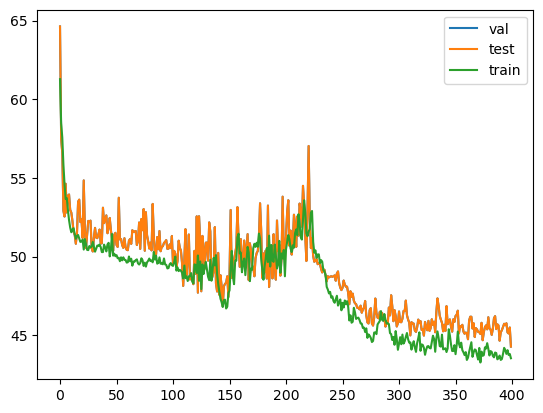

In [64]:
# loss graph

x_list = [i for i in range(0, len(train_loss_hist))]

plt.plot(x_list[0:400], val_loss_hist[0:400], label='val')
plt.plot(x_list[0:400], test_loss_hist[0:400], label='test')
plt.plot(x_list[0:400], train_loss_hist[0:400], label='train')

# plt.plot(x_list, test_loss_hist, label='test') # , color = 'red')

plt.legend()
plt.show()

In [ ]:
x_list = [i for i in range(0, len(train_loss_hist))]

plt.plot(x_list[0:400], val_loss_hist[0:400], label='val')
plt.plot(x_list[0:400], test_loss_hist[0:400], label='test')
plt.plot(x_list[0:400], train_loss_hist[0:400], label='train')

# plt.plot(x_list, test_loss_hist, label='test') # , color = 'red')

plt.legend()
plt.show()

In [78]:
## load best model
device = torch.device('cuda') #  if torch.cuda.is_available() else 'cpu')

model_path = mod_name
MOD = PointNet().to(device)

MOD.load_state_dict(torch.load(model_path))


<All keys matched successfully>

In [79]:
## PREDICTIONS on a sample ##

@torch.no_grad()
def predict(model, DATA):
    narr = np.zeros(len(np.array(DATA.pos)[0:,0]), dtype = "int")
    narr = torch.from_numpy(narr).to(device)
#     for data in loader:
    model.eval()
    pred = model(DATA.pos.to(device), data.edge_index.to(device), narr)
#         y_output_pred.squeeze(-1)
#         loss = criterion(preds.to(torch.float32).squeeze(-1).to(device), data.y.to(torch.float32).to(device)) # Loss computation.
#         total_MSE += loss.item() #  * data.num_graphs
#         count+=1
        
    return DATA.grow_len2.item(), pred[0].to(torch.float32).squeeze(-1).to(device).item(), DATA.branches2.item(), pred[1].to(torch.float32).squeeze(-1).to(device).item(), DATA.flush2.item(), pred[2].to(torch.float32).squeeze(-1).to(device).item() # len(test_loader.dataset))


# data_example = data_test[15]
# predict(model, data_example)

In [80]:
## BATCH predict ##
import numpy as np

actual = []
pred = []
actual1 = []
pred1 = []
actual2 = []
pred2 = []
n_points = []

for data in DBH_DS_test:
    model.eval()
    y_true, y_hat, y_true1, y_hat1, y_true2, y_hat2 = predict(MOD, data)
    n_points.append(len(data.pos[0:, 0]))
#     print(data.pos[0:, 0])
    actual.append(y_true)
    pred.append(y_hat)
    actual1.append(y_true1)
    pred1.append(y_hat1)
    actual2.append(y_true2)
    pred2.append(y_hat2)

# inversed_actual = scaler.inverse_transform(np.array(actual).reshape(-1, 1))
# inversed_pred = scaler.inverse_transform(np.array(pred).reshape(-1, 1))

# rms = mean_squared_error(inversed_actual, inversed_pred, squared=False)
rms = mean_squared_error(actual, pred, squared=False)
MAPE = mean_absolute_percentage_error(actual, pred) # 20% (5.3, 0.15 on a good run!)

rms2 = mean_squared_error(actual1, pred1, squared=False)
MAPE2 = mean_absolute_percentage_error(actual1, pred1) # 20% (5.3, 0.15 on a good run!)

rms3 = mean_squared_error(actual2, pred2, squared=False)
MAPE3 = mean_absolute_percentage_error(actual2, pred2) # 20% (5.3, 0.15 on a good run!)

print(rms, MAPE, rms2, MAPE2, rms3, MAPE3)


14.572591174885762 5867543553840049.0 35.652406270840125 4.086225498027139e+16 18.34101422737644 7432339001204806.0


In [122]:
""" SAME BUT ROUNDED """
## BATCH predict ##

actual = []
pred = []
actual1 = []
pred1 = []
actual2 = []
pred2 = []
n_points = []

for data in DBH_DS_test:
    model.eval()
    y_true, y_hat, y_true1, y_hat1, y_true2, y_hat2 = predict(MOD, data)
    n_points.append(len(data.pos[0:, 0]))
#     print(data.pos[0:, 0])
    actual.append(y_true)
    pred.append(y_hat)
    actual1.append(y_true1)
    pred1.append(y_hat1)
    actual2.append(y_true2)
    pred2.append(y_hat2)

pred = [0 if i < 0 else i for i in pred]
pred = [100 if i > 100 else i for i in pred]

pred1 = [0 if i < 0 else i for i in pred1]
pred1 = [100 if i > 100 else i for i in pred1]

pred2 = [0 if i < 0 else i for i in pred2]
pred2 = [100 if i > 100 else i for i in pred2]

# inversed_actual = scaler.inverse_transform(np.array(actual).reshape(-1, 1))
# inversed_pred = scaler.inverse_transform(np.array(pred).reshape(-1, 1))

# rms = mean_squared_error(inversed_actual, inversed_pred, squared=False)
rms = mean_squared_error(actual, pred, squared=False)
MAPE = mean_absolute_percentage_error(actual, pred) # 20% (5.3, 0.15 on a good run!)

rms2 = mean_squared_error(actual1, pred1, squared=False)
MAPE2 = mean_absolute_percentage_error(actual1, pred1) # 20% (5.3, 0.15 on a good run!)

rms3 = mean_squared_error(actual2, pred2, squared=False)
MAPE3 = mean_absolute_percentage_error(actual2, pred2) # 20% (5.3, 0.15 on a good run!)

print(rms, MAPE, rms2, MAPE2, rms3, MAPE3)

14.165036210219712 3344482948211038.0 35.65240646952455 4.086225575116296e+16 18.14766163637332 7426428098350089.0


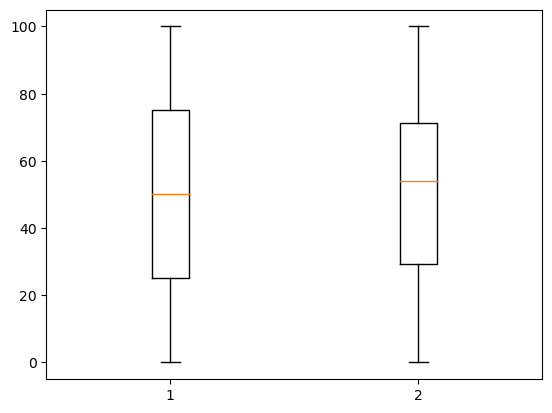

In [89]:

plt.boxplot([actual, pred]) ## need to recode values to within 0-100!
plt.show()

In [34]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(actual, pred)
print("R2", r_value)

R2 0.9809153861123402


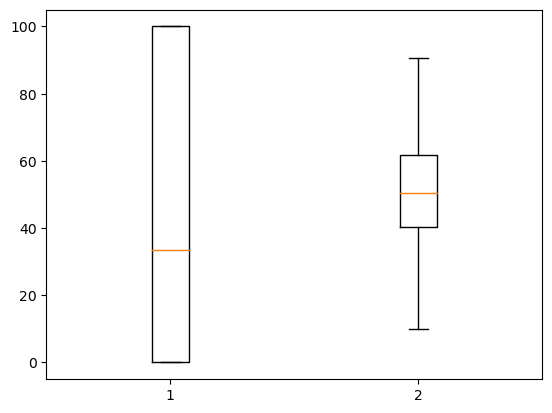

In [88]:
plt.boxplot([actual1, pred1]) ## 
plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(pred1, n_pos_orig)
print("R2", r_value)

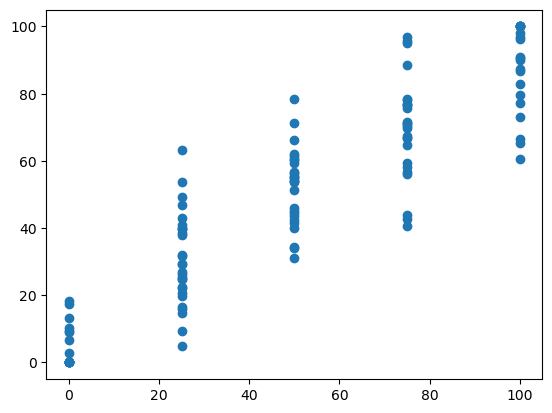

In [123]:
# plt.scatter(inversed_actual, inversed_pred)
plt.scatter(actual, pred) # x, y
plt.show()

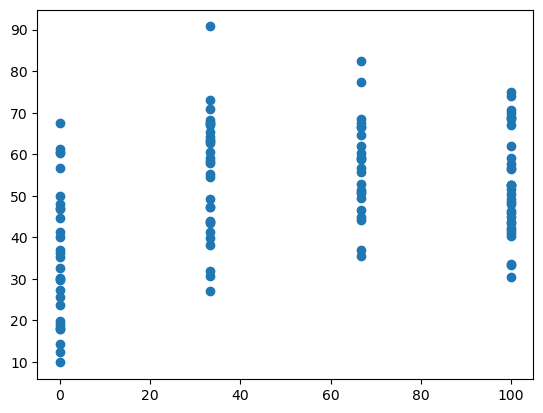

In [118]:
plt.scatter(actual1, pred1) # x, y
plt.show()

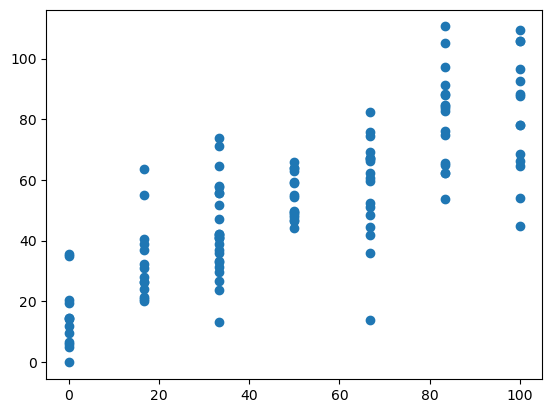

In [119]:
plt.scatter(actual2, pred2) # x, y
plt.show()

# inversed_actualGL, inversed_predGL

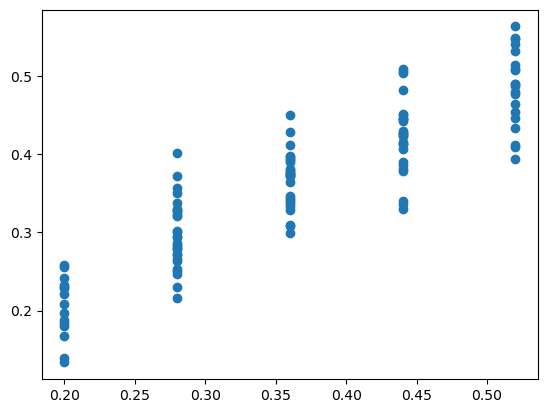

In [120]:
plt.scatter(inversed_actualGL, inversed_predGL) # x, y
plt.show()

In [128]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(inversed_actualGL.flatten(), inversed_predGL.flatten())
print("R2", r_value)

R2 0.8986092113299938


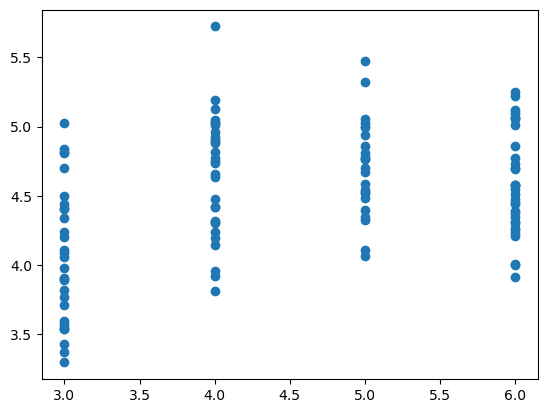

In [124]:
plt.scatter(inversed_actualBR, inversed_predBR) # x, y
plt.show() ## poor results probably because the variable is "Up to 3/4/5/6 not actually 3/4/5/6"

In [129]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(inversed_actualBR.flatten(), inversed_predBR.flatten())
print("R2", r_value)

R2 0.37418724594636404


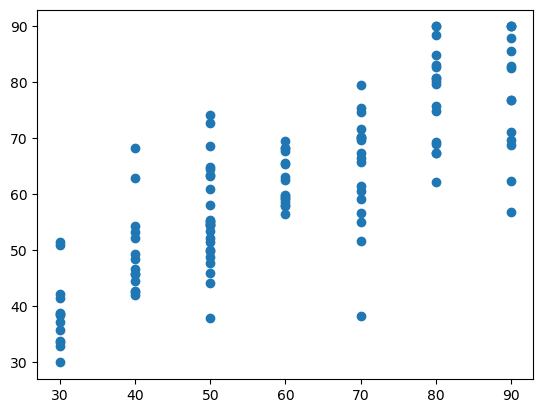

In [125]:
plt.scatter(inversed_actualFL, inversed_predFL) # x, y
plt.show()

In [130]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(inversed_actualFL.flatten(), inversed_predFL.flatten())
print("R2", r_value)

R2 0.8166771980471837


In [ ]:
l = [x * -1 for x in min_z_t]
lists_of_lists = [max_z_t, l]
diff = [sum(x) for x in zip(*lists_of_lists)]

In [5]:
plt.scatter(pred, diff) # x, y
plt.show()

NameError: name 'pred' is not defined

In [121]:
## INVERSE SCALE BATCH predict ##
actual = []
pred = []
actual1 = []
pred1 = []
actual2 = []
pred2 = []
n_points = []

y_diff = []
y_diff1 = []
y_diff2 = []

for data in DBH_DS_test:
#     try:
    model.eval()
    y_true, y_hat, y_true1, y_hat1, y_true2, y_hat2 = predict(MOD, data)
    n_points.append(len(data.pos[0:, 0]))
    actual.append(y_true)
    pred.append(y_hat)
    y_diff.append(abs(y_true-y_hat))

    actual1.append(y_true1)
    pred1.append(y_hat1)
    y_diff1.append(abs(y_true1-y_hat1))

    actual2.append(y_true2)
    pred2.append(y_hat2)
    y_diff1.append(abs(y_true2-y_hat2))

pred = [0 if i < 0 else i for i in pred]
pred = [100 if i > 100 else i for i in pred]

pred1 = [0 if i < 0 else i for i in pred1]
pred1 = [100 if i > 100 else i for i in pred1]

pred2 = [0 if i < 0 else i for i in pred2]
pred2 = [100 if i > 100 else i for i in pred2]

inversed_actualGL = scalerGL.inverse_transform(np.array(actual).reshape(-1, 1))
inversed_predGL = scalerGL.inverse_transform(np.array(pred).reshape(-1, 1))
rms = mean_squared_error(inversed_actualGL, inversed_predGL, squared=False)
MAPE = mean_absolute_percentage_error(inversed_actualGL, inversed_predGL) # 20% (5.3, 0.15 on a good run!)
print("inverse RMS GL", rms, inversed_actualGL.min(), inversed_predGL.max(), MAPE)

inversed_actualBR = scalerBR.inverse_transform(np.array(actual1).reshape(-1, 1))
inversed_predBR = scalerBR.inverse_transform(np.array(pred1).reshape(-1, 1))
rms = mean_squared_error(inversed_actualBR, inversed_predBR, squared=False)
MAPE = mean_absolute_percentage_error(inversed_actualBR, inversed_predBR) # 20% (5.3, 0.15 on a good run!)
print("inverse RMS BR", rms, inversed_actualBR.min(), inversed_actualBR.max(), MAPE)

inversed_actualFL = scalerFL.inverse_transform(np.array(actual2).reshape(-1, 1))
inversed_predFL = scalerFL.inverse_transform(np.array(pred2).reshape(-1, 1))
rms = mean_squared_error(inversed_actualFL, inversed_predFL, squared=False)
MAPE = mean_absolute_percentage_error(inversed_actualFL, inversed_predFL) # 20% (5.3, 0.15 on a good run!)
print("inverse RMS FL", rms, inversed_actualFL.min(), inversed_actualFL.max(), MAPE)

inverse RMS GL 0.04532810938542066 0.20000000298023224 0.5199999809265137 0.09595933325654958
inverse RMS BR 1.0695722009054744 3.0 6.0 0.21515843834811285
inverse RMS FL 10.888595017952213 30.0 90.0 0.15149469089949177


In [132]:
print("test data distributions - Original scale")
print("GL", np.unique(inversed_actualGL, return_counts = True))
print("BR", np.unique(inversed_actualBR, return_counts = True))
print("FL",np.unique(inversed_actualFL, return_counts = True))

test data distributions - Original scale
GL (array([0.2       , 0.28      , 0.35999999, 0.43999999, 0.51999998]), array([15, 29, 27, 26, 20]))
BR (array([3.        , 3.99990005, 5.00009995, 6.        ]), array([30, 30, 24, 33]))
FL (array([30.        , 40.00200005, 49.9980011 , 60.        , 70.0019989 ,
       79.9980011 , 90.        ]), array([13, 14, 25, 16, 18, 17, 14]))


In [131]:
print("test data distributions 100 scale")
print("GL", np.unique(actual, return_counts = True))
print("BR", np.unique(actual1, return_counts = True))
print("FL", np.unique(actual2, return_counts = True))

test data distributions 100 scale
GL (array([  0.,  25.,  50.,  75., 100.]), array([15, 29, 27, 26, 20]))
BR (array([  0.        ,  33.33000183,  66.66999817, 100.        ]), array([30, 30, 24, 33]))
FL (array([  0.        ,  16.67000008,  33.33000183,  50.        ,
        66.66999817,  83.33000183, 100.        ]), array([13, 14, 25, 16, 18, 17, 14]))


In [114]:
print("Full dataset ")
print("GL", np.unique(grow_len, return_counts = True))
print("BR", np.unique(branches, return_counts = True))
print("FL",np.unique(flush, return_counts = True))

Full dataset - why does test only have 
GL (array([0.2       , 0.28      , 0.36000001, 0.44      , 0.51999998]), array([252, 252, 252, 252, 165]))
BR (array([3., 4., 5., 6.]), array([294, 294, 294, 291]))
FL (array([30., 40., 50., 60., 70., 80., 90.]), array([168, 168, 168, 168, 167, 167, 167]))


In [ ]:
lists_of_lists = [max_z_t, min_z_t]
diff = [sum(x) for x in zip(*lists_of_lists)]

In [ ]:
plt.scatter(pred, diff) # x, y
plt.show()

In [ ]:
plt.scatter(pred, n_pos_t) # x, y
plt.show()

In [ ]:
plt.scatter(actual, n_pos_t) # x, y
plt.show()